In [1]:
from __future__ import division
import scipy.stats as stats
import numpy as np
import matplotlib.pylab as plt

Set the seed so results are reproducible.

In [2]:
np.random.seed(123)

Create a function that computes the Jarque-Bera test statistic.

In [3]:
def jb(x):
    """Comutes the Jarque-Bera test statistic along columns.

    Args:
        x (numpy.ndarray): array where every column is an N-dimensional sample.
    
    Returns:
        float: Jarque-Bera test statistic
    """
    n = len(x)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return n / 6 * (skew**2 + kurtosis**2 / 4)

Reproduce Jarque-Bera test statistic computed using `scipy.stats.jarque_bera`

In [4]:
sample = np.random.normal(size=30)
scipy_jb, scipy_p = stats.jarque_bera(sample)
print("Jarque-Bera: Scipy = {0}. Reproduced = {1}".format(scipy_jb, jb(sample)))

Jarque-Bera: Scipy = 0.976606880492. Reproduced = 0.976606880492


Plot the histogram of JB values calculated for samples of the standard normal and compare it with the PDF of $\chi_2^2$.

In [5]:
def chi2_fit(teststats):
    # Chi-2 pdf for a range of values
    x = np.linspace(0, 20, 100)
    chi2 = stats.chi2(2).pdf(x)
    plt.plot(x, chi2, label='Chi-2')
    
    # Plot histogram of test statistic samples
    plt.hist(teststats, bins=100, normed=True, label='Jarque-Bera')

    plt.xlim(0, 20)
    plt.legend()

Compute right-tail p-value from test statistic samples and compare the result with `scipy.stats.jarque_bera`.

In [6]:
def p_value(teststats, N):
    s = np.random.normal(size=N)
    observed_jb = jb(s)
    p = len(teststats[teststats > observed_jb]) / len(teststats)
    _, scipy_p = stats.jarque_bera(s)
    print("p-value: Scipy = {0}, Reproduced = {1}".format(scipy_p, p))

Consider first a large sample size: $N = 3000$. We see that the test statistic distribution is well approximated by the $\chi_2^2$ distribution. (Usually $N > 2000$ is considered large enough for the approximation to hold.) Also, we're able to reproduce p-value of `scipy.stats.jarque_bera` with good accuracy.

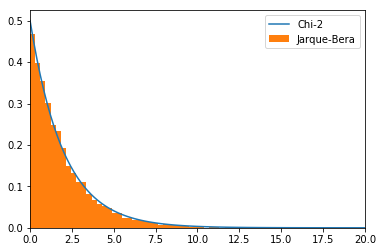

In [7]:
# Generate n samples of the standard normal, compute JB,
# and repeat to a get a distribution
N_l = 3000
teststats_l = jb(np.random.normal(size=(N_l, 10000)))
chi2_fit(teststats_l);

In [8]:
p_value(teststats_l, N_l)

p-value: Scipy = 0.0731561813257, Reproduced = 0.0682


Now let's look at a small sample size: $N=20$. We see that $\chi_2^2$ is no longer a good approximation and that our own calculation of p-value no longer matches that of `scipy.stats.jarque_bera`. The reason is that `scipy.stats.jarque_bera` actually uses the $\chi_2^2$ distribution. From the plot we can see that $\chi_2^2$ will often produce higher p-values.

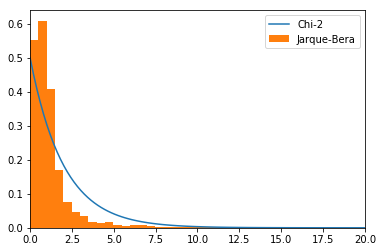

In [9]:
N_s = 20
teststats_s = jb(np.random.normal(size=(N_s, 10000)))
chi2_fit(teststats_s);

In [10]:
p_value(teststats_s, N_s)

p-value: Scipy = 0.288320881828, Reproduced = 0.0986
